<h3>Project Details : Cancer risk prediction</h3>

#### Import necessary libraries

In [1]:
#Data wrangling
import pandas as pd
import numpy as np

#Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

#To supress warningss
import warnings
warnings.filterwarnings("ignore")

### 1).Data Collection & Sanity Checks
(Involves Python Programming & Pandas skills)

#### Load Data
Before you load the data, go through the data dictionary if one exists.

In [2]:
pat_df = pd.read_excel('clf_data_set/patient_data.xlsx')

#### Perform Sanity Checks  to verify the data integrity
Get to know if you recevied the right data in right volume

In [3]:
#rows,columns
pat_df.shape

(1010, 14)

In [4]:
pat_df.columns

Index(['Sl.No', 'Patient #', 'Region', 'Gender', 'Age', 'Smokes',
       'No of Ciggarets per day', 'No of Hrs Sleep per Day',
       'No of Hrs Exercise per Day', 'Diet', 'Alcoholic', 'Height',
       'Complexion', 'Cancer Diagnosis Result'],
      dtype='object')

In [5]:
pat_df.head()

,Sl.No,Patient #,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,1,Patient 1,NI,Male,24.0,NO,15.0,8.0,2.66,Vegetarian,Occasional,5.687164,Fair,Negative
1,2,Patient 2,SI,Male,32.0,YES,27.0,9.0,1.27,NonVegetarian,Regular,4.071704,Dark,Positive
2,3,Patient 3,SI,Male,28.0,YES,29.0,10.0,1.18,Vegetarian,Occasional,5.509791,Wheatish,Negative
3,4,Patient 4,NE,NaN,33.0,NO,NaN,7.0,2.77,Vegetarian,NaN,5.165676,NaN,Positive
4,5,Patient 5,NE,Female,58.0,NO,21.0,9.0,1.55,Vegetarian,Regular,5.636116,Fair,Negative


In [6]:
pat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
Sl.No                         1010 non-null int64
Patient #                     993 non-null object
Region                        1009 non-null object
Gender                        1005 non-null object
Age                           1008 non-null float64
Smokes                        1007 non-null object
No of Ciggarets per day       1009 non-null float64
No of Hrs Sleep per Day       1009 non-null float64
No of Hrs Exercise per Day    1008 non-null object
Diet                          1004 non-null object
Alcoholic                     1005 non-null object
Height                        1007 non-null float64
Complexion                    1006 non-null object
Cancer Diagnosis Result       1010 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 110.6+ KB


In [7]:
#Total number of records 1010
pat_df.describe()

,Sl.No,Age,No of Ciggarets per day,No of Hrs Sleep per Day,Height
count,1010.000000,1008.000000,1009.000000,1009.000000,1007.000000
mean,505.500000,39.055556,15.666997,7.971259,5.020045
std,291.706188,14.175131,8.576460,1.411463,0.578126
min,1.000000,4.000000,1.000000,6.000000,4.000218
25%,253.250000,29.000000,8.000000,7.000000,4.519333
50%,505.500000,38.500000,15.000000,8.000000,5.021934
75%,757.750000,49.000000,23.000000,9.000000,5.527988
max,1010.000000,222.000000,30.000000,10.000000,5.999900


In [8]:
#Total number of records 1010
pat_df.describe(include='object')

,Patient #,Region,Gender,Smokes,No of Hrs Exercise per Day,Diet,Alcoholic,Complexion,Cancer Diagnosis Result
count,993,1009,1005,1007,1008.00,1004,1005,1006,1010
unique,993,6,2,2,298.00,2,2,4,2
top,Patient 281,NE,Female,NO,1.18,Vegetarian,Regular,Brown,Positive
freq,1,350,504,531,9.00,511,507,252,523


In [9]:
pat_df.dtypes

Sl.No                           int64
Patient #                      object
Region                         object
Gender                         object
Age                           float64
Smokes                         object
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day     object
Diet                           object
Alcoholic                      object
Height                        float64
Complexion                     object
Cancer Diagnosis Result        object
dtype: object

In [10]:
#check if column has at least one null 
pat_df.isnull().any()

Sl.No                         False
Patient #                      True
Region                         True
Gender                         True
Age                            True
Smokes                         True
No of Ciggarets per day        True
No of Hrs Sleep per Day        True
No of Hrs Exercise per Day     True
Diet                           True
Alcoholic                      True
Height                         True
Complexion                     True
Cancer Diagnosis Result       False
dtype: bool

In [11]:
pat_df.isnull().sum()

Sl.No                          0
Patient #                     17
Region                         1
Gender                         5
Age                            2
Smokes                         3
No of Ciggarets per day        1
No of Hrs Sleep per Day        1
No of Hrs Exercise per Day     2
Diet                           6
Alcoholic                      5
Height                         3
Complexion                     4
Cancer Diagnosis Result        0
dtype: int64

In [12]:
#cancer risk status
pat_df["Cancer Diagnosis Result"].unique()

array(['Negative', 'Positive'], dtype=object)

In [13]:
pat_df["Cancer Diagnosis Result"].value_counts()

Positive    523
Negative    487
Name: Cancer Diagnosis Result, dtype: int64

In [14]:
label_count  = pd.DataFrame(pat_df['Cancer Diagnosis Result'].value_counts()).reset_index()
label_count.columns = ['Cancer Diagnosis Result','Count']
label_count

,Cancer Diagnosis Result,Count
0,Positive,523
1,Negative,487


In [15]:
1-487/523

0.06883365200764824

#### Drop the meaning less columns / variables/

In [16]:
pat_df.shape

(1010, 14)

In [17]:
pat_df.drop(columns=["Sl.No","Patient #"],inplace=True) # TRACK / NOTE IT IN EXCEL

In [18]:
pat_df.shape

(1010, 12)

In [19]:
pat_df.head()

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,NI,Male,24.0,NO,15.0,8.0,2.66,Vegetarian,Occasional,5.687164,Fair,Negative
1,SI,Male,32.0,YES,27.0,9.0,1.27,NonVegetarian,Regular,4.071704,Dark,Positive
2,SI,Male,28.0,YES,29.0,10.0,1.18,Vegetarian,Occasional,5.509791,Wheatish,Negative
3,NE,NaN,33.0,NO,NaN,7.0,2.77,Vegetarian,NaN,5.165676,NaN,Positive
4,NE,Female,58.0,NO,21.0,9.0,1.55,Vegetarian,Regular,5.636116,Fair,Negative


## 2). Data Wrangling & EDA (Exploratory Data Analysis)

Aim is to get intution of the data, also prepare the data for "Training". <b> Below are must to do activities ... </b> apart from others.

1). Split the data to Train & Test sets, Keep working on Train Set only till you finish CrossValidataion & 
ModelTuning.

2). Impute missing values - Involves Pandas & Sklearn Skill

3). Convert Categorical (Qualitative) data to Numerical (Quantitative) data - Involves Pandas & Sklearn Skill

#### EDA - Univariate and Bivariate Anaysis - Pandas profiling 

In [20]:
#OPTIONAL - IT's A THIRD PARY TOOL
import pandas_profiling
pat_df.profile_report(title='Patient_Analysis_Report', \
            plot={'histogram': {'bins': 8}}).to_file(output_file="cancer_patient_analysis_report.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>Feature Engineering Acticities:</b>

Observations that need data transformation (in production as well):

1). Age columns must hold a value between 0 to 100, delete all other values. Or replace/impute the outliers values.

2). Numeric columns like "No of Hrs Sleep per Day" and "No of Hrs Exercise per Day" must hold numeric values only

3). Region column should not hold any other value than SI, NI, NE

4). No column (variable / feature) should have "missing values". And, no column should be categorical in nature.

In [21]:
pat_df.describe()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,Height
count,1008.000000,1009.000000,1009.000000,1007.000000
mean,39.055556,15.666997,7.971259,5.020045
std,14.175131,8.576460,1.411463,0.578126
min,4.000000,1.000000,6.000000,4.000218
25%,29.000000,8.000000,7.000000,4.519333
50%,38.500000,15.000000,8.000000,5.021934
75%,49.000000,23.000000,9.000000,5.527988
max,222.000000,30.000000,10.000000,5.999900


In [22]:
pat_df.select_dtypes("object").describe()

,Region,Gender,Smokes,No of Hrs Exercise per Day,Diet,Alcoholic,Complexion,Cancer Diagnosis Result
count,1009,1005,1007,1008.00,1004,1005,1006,1010
unique,6,2,2,298.00,2,2,4,2
top,NE,Female,NO,1.18,Vegetarian,Regular,Brown,Positive
freq,350,504,531,9.00,511,507,252,523


In [23]:
pat_df.head()

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,NI,Male,24.0,NO,15.0,8.0,2.66,Vegetarian,Occasional,5.687164,Fair,Negative
1,SI,Male,32.0,YES,27.0,9.0,1.27,NonVegetarian,Regular,4.071704,Dark,Positive
2,SI,Male,28.0,YES,29.0,10.0,1.18,Vegetarian,Occasional,5.509791,Wheatish,Negative
3,NE,NaN,33.0,NO,NaN,7.0,2.77,Vegetarian,NaN,5.165676,NaN,Positive
4,NE,Female,58.0,NO,21.0,9.0,1.55,Vegetarian,Regular,5.636116,Fair,Negative


In [24]:
pat_df.dtypes

Region                         object
Gender                         object
Age                           float64
Smokes                         object
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day     object
Diet                           object
Alcoholic                      object
Height                        float64
Complexion                     object
Cancer Diagnosis Result        object
dtype: object

In [25]:
#look at max value, it's 222 which is not a realistic value
pat_df["Age"].describe()

count    1008.000000
mean       39.055556
std        14.175131
min         4.000000
25%        29.000000
50%        38.500000
75%        49.000000
max       222.000000
Name: Age, dtype: float64

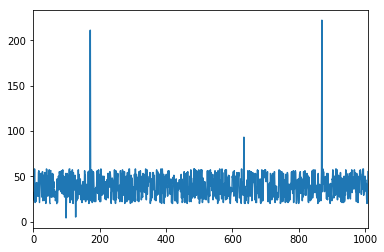

In [26]:
pat_df["Age"].plot()

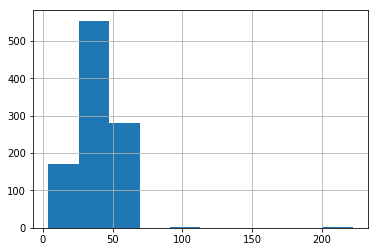

In [27]:
pat_df["Age"].hist()

In [28]:
pat_df[~pat_df['Age'].between(0,100)]["Age"]

52       NaN
70       NaN
172    211.0
870    222.0
Name: Age, dtype: float64

In [29]:
pat_df['No of Hrs Exercise per Day'].head()

0    2.66
1    1.27
2    1.18
3    2.77
4    1.55
Name: No of Hrs Exercise per Day, dtype: object

In [30]:
#filter all those values which are not numeric in nature 
pat_df[~pat_df['No of Hrs Exercise per Day'].apply(lambda x: np.isreal(x))]['No of Hrs Exercise per Day']

13     2.32Hrs
97     0.75Hrs
453    1.84hrs
740    0.25Hrs
Name: No of Hrs Exercise per Day, dtype: object

In [31]:
pat_df["Region"].unique()

array(['NI', 'SI', 'NE', 'NL', nan, 'N1', 'S1'], dtype=object)

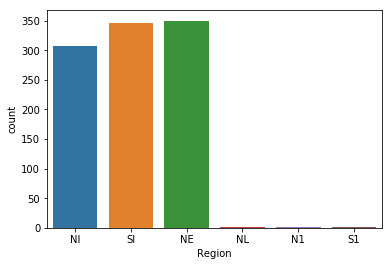

In [32]:
sns.countplot(pat_df["Region"])

In [33]:
pat_df["Region"].value_counts()

NE    350
SI    346
NI    308
NL      2
N1      2
S1      1
Name: Region, dtype: int64

In [34]:
#show the records which are not in SI, NE, NI
pat_df[~pat_df["Region"].isin(['SI','NE','NI'])]["Region"]

283     NL
381    NaN
505     NL
613     N1
750     S1
879     N1
Name: Region, dtype: object

In [35]:
pat_df.select_dtypes("object")

,Region,Gender,Smokes,No of Hrs Exercise per Day,Diet,Alcoholic,Complexion,Cancer Diagnosis Result
0,NI,Male,NO,2.66,Vegetarian,Occasional,Fair,Negative
1,SI,Male,YES,1.27,NonVegetarian,Regular,Dark,Positive
2,SI,Male,YES,1.18,Vegetarian,Occasional,Wheatish,Negative
3,NE,NaN,NO,2.77,Vegetarian,NaN,NaN,Positive
4,NE,Female,NO,1.55,Vegetarian,Regular,Fair,Negative
...,...,...,...,...,...,...,...,...
1005,NE,Female,YES,1.9,NonVegetarian,Regular,Fair,Positive
1006,SI,Female,YES,0.62,Vegetarian,Regular,Brown,Negative
1007,SI,Male,YES,1.07,NonVegetarian,Regular,Wheatish,Positive
1008,SI,Male,YES,2.7,Vegetarian,Occasional,Wheatish,Negative


In [36]:
pat_df.isnull().any()

Region                         True
Gender                         True
Age                            True
Smokes                         True
No of Ciggarets per day        True
No of Hrs Sleep per Day        True
No of Hrs Exercise per Day     True
Diet                           True
Alcoholic                      True
Height                         True
Complexion                     True
Cancer Diagnosis Result       False
dtype: bool

In [37]:
pat_df.isnull().sum()

Region                        1
Gender                        5
Age                           2
Smokes                        3
No of Ciggarets per day       1
No of Hrs Sleep per Day       1
No of Hrs Exercise per Day    2
Diet                          6
Alcoholic                     5
Height                        3
Complexion                    4
Cancer Diagnosis Result       0
dtype: int64

In [38]:
pat_df.dtypes

Region                         object
Gender                         object
Age                           float64
Smokes                         object
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day     object
Diet                           object
Alcoholic                      object
Height                        float64
Complexion                     object
Cancer Diagnosis Result        object
dtype: object

### Build the Data Transformation Pipeline

<b>Develop Data Transformation pipeline on "Train Set" for below issues,the same pipeline will be used on Test Set & Prodution Set as well.</b>

> 1). Age columns must hold a value between 0 to 100, delete all other values.

> 2). Numeric columns like "No of Hrs Sleep per Day" and "No of Hrs Exercise per Day" must hold numeric values only

> 3). Region column should not hold any other value than SI, NI, NE

> 4). No column (variable / feature) should have "missing values". And, no column should be categorical in nature.

In [39]:
from sklearn.model_selection import train_test_split

In [31]:
#train_test_split() takes X,y as input hence we first prepare X,y

#x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [40]:
pat_df.columns

Index(['Region', 'Gender', 'Age', 'Smokes', 'No of Ciggarets per day',
       'No of Hrs Sleep per Day', 'No of Hrs Exercise per Day', 'Diet',
       'Alcoholic', 'Height', 'Complexion', 'Cancer Diagnosis Result'],
      dtype='object')

In [41]:
pat_df.shape

(1010, 12)

In [42]:
#X = pat_df.iloc[:,:(len(pat_df.columns)-1)]
#y = pat_df[pat_df.columns[-1:]]

X = pat_df.drop(columns=['Cancer Diagnosis Result'])
y = pat_df[['Cancer Diagnosis Result']]

print (X.shape, y.shape)

(1010, 11) (1010, 1)


In [43]:
X.head()

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion
0,NI,Male,24.0,NO,15.0,8.0,2.66,Vegetarian,Occasional,5.687164,Fair
1,SI,Male,32.0,YES,27.0,9.0,1.27,NonVegetarian,Regular,4.071704,Dark
2,SI,Male,28.0,YES,29.0,10.0,1.18,Vegetarian,Occasional,5.509791,Wheatish
3,NE,NaN,33.0,NO,NaN,7.0,2.77,Vegetarian,NaN,5.165676,NaN
4,NE,Female,58.0,NO,21.0,9.0,1.55,Vegetarian,Regular,5.636116,Fair


In [44]:
y.head()

,Cancer Diagnosis Result
0,Negative
1,Positive
2,Negative
3,Positive
4,Negative


In [45]:
# we are performing "Stratified Sampling", why do we have to do it ?
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [46]:
print (X.shape, y.shape)

(1010, 11) (1010, 1)


In [47]:
print ("Train Set Size : ",x_train.shape,y_train.shape)
print ("Test Set Size : ",x_test.shape,y_test.shape)

Train Set Size :  (757, 11) (757, 1)
Test Set Size :  (253, 11) (253, 1)


In [48]:
x_train.head()

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion
94,SI,Female,28.0,NO,24.0,8.0,2.59,NonVegetarian,Regular,4.365304,Brown
176,NI,Female,57.0,NO,11.0,8.0,1.47,NonVegetarian,Occasional,5.313231,Wheatish
264,NI,Female,43.0,NO,5.0,10.0,1.08,NonVegetarian,Occasional,4.901327,Fair
124,SI,Male,35.0,NO,16.0,7.0,1.64,NonVegetarian,Occasional,5.195423,Wheatish
458,SI,Female,48.0,YES,20.0,8.0,2.22,Vegetarian,Regular,4.666848,Brown


In [49]:
y_train.head()

,Cancer Diagnosis Result
94,Negative
176,Positive
264,Negative
124,Positive
458,Positive


In [50]:
y_train["Cancer Diagnosis Result"].value_counts()

Positive    392
Negative    365
Name: Cancer Diagnosis Result, dtype: int64

In [51]:
y_test["Cancer Diagnosis Result"].value_counts()

Positive    131
Negative    122
Name: Cancer Diagnosis Result, dtype: int64

In [52]:
y["Cancer Diagnosis Result"].value_counts()

Positive    523
Negative    487
Name: Cancer Diagnosis Result, dtype: int64

In [53]:
#487*25

In [54]:
#print (round((523*75)/100), round((487*75)/100))
#print (round((523*25)/100), round((487*25)/100))

#print (y_train["Cancer Diagnosis Result"].value_counts())
#print (y_test["Cancer Diagnosis Result"].value_counts())

### Let's fix data issues on train set

In [55]:
train_set = pd.concat([x_train,y_train],axis=1)

In [56]:
test_set = pd.concat([x_test,y_test],axis=1)

In [57]:
print (train_set.shape, test_set.shape)

(757, 12) (253, 12)


In [58]:
train_set.columns

Index(['Region', 'Gender', 'Age', 'Smokes', 'No of Ciggarets per day',
       'No of Hrs Sleep per Day', 'No of Hrs Exercise per Day', 'Diet',
       'Alcoholic', 'Height', 'Complexion', 'Cancer Diagnosis Result'],
      dtype='object')

In [59]:
train_set.select_dtypes("object").columns

Index(['Region', 'Gender', 'Smokes', 'No of Hrs Exercise per Day', 'Diet',
       'Alcoholic', 'Complexion', 'Cancer Diagnosis Result'],
      dtype='object')

In [60]:
#show the reocrds which  dont fall between 0 to 100
train_set[~train_set["Age"].between(0,100)]

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
172,NE,Female,211.0,YES,15.0,8.0,1.53,NonVegetarian,Regular,5.676446,Fair,Positive
52,NE,Male,NaN,YES,15.0,9.0,0.97,NonVegetarian,Regular,5.109140,Dark,Negative
870,NE,Male,222.0,YES,29.0,6.0,1.01,Vegetarian,Regular,4.420562,Dark,Negative


In [61]:
#show the records which are not numeric
train_set[~train_set['No of Hrs Exercise per Day'].apply(lambda x: np.isreal(x))]['No of Hrs Exercise per Day']

740    0.25Hrs
97     0.75Hrs
13     2.32Hrs
453    1.84hrs
Name: No of Hrs Exercise per Day, dtype: object

In [62]:
#show the records which are not in SI, NE, NI
train_set[~train_set["Region"].isin(['SI','NE','NI'])]

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
879,N1,Male,48.0,YES,25.0,9.0,2.75,NonVegetarian,Occasional,4.547962,Wheatish,Positive
283,NL,Female,25.0,NO,21.0,6.0,0.41,NonVegetarian,Regular,5.850890,Dark,Positive
750,S1,Male,40.0,YES,5.0,10.0,1.73,Vegetarian,Occasional,4.195001,Fair,Positive
505,NL,Male,57.0,YES,7.0,7.0,0.19,NonVegetarian,Regular,5.548610,Brown,Positive
613,N1,Female,26.0,NO,22.0,6.0,1.14,Vegetarian,Regular,5.399313,Dark,Positive


In [63]:
train_set.shape

(757, 12)

In [59]:
#train_set["Cancer Diagnosis Result"].apply(lambda x: 1 if x.lower()=="positive" else 0)

In [64]:
def patient_clean_up(df):
    #'Age' clean-up -- drop the records which are not between 0 & 100
    age_index = df[~df["Age"].between(0,100)].index
    df.drop(age_index,inplace=True)
    
    # 'No of Hrs Exercise per Day' clean-up -- remove all characters in a float
    #and convert the series to float type
    df['No of Hrs Exercise per Day'] = df['No of Hrs Exercise per Day'].\
                                        replace(r'\D+', '', regex=True).astype(float)
        
    
    #'Region' clean-up -- drop the records which are not standard
    df.drop(df[~df["Region"].isin(['SI','NE','NI'])].index,inplace=True)
    df["Cancer Diagnosis Result"] = df["Cancer Diagnosis Result"]\
                                .apply(lambda x: 1 if x.lower()=="positive" else 0)
    
    
    return df

In [65]:
train_set = patient_clean_up(train_set)

In [66]:
train_set.shape

(749, 12)

In [67]:
train_set[~train_set["Age"].between(0,100)]

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result


In [68]:
train_set['No of Hrs Exercise per Day'].dtype

dtype('float64')

In [69]:
train_set[~train_set["Region"].isin(['SI','NE','NI'])]

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result


In [70]:
train_set["Region"].unique()

array(['SI', 'NI', 'NE'], dtype=object)

In [71]:
train_set.dtypes

Region                         object
Gender                         object
Age                           float64
Smokes                         object
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day    float64
Diet                           object
Alcoholic                      object
Height                        float64
Complexion                     object
Cancer Diagnosis Result         int64
dtype: object

In [72]:
train_set.isnull().any()

Region                        False
Gender                         True
Age                           False
Smokes                         True
No of Ciggarets per day        True
No of Hrs Sleep per Day        True
No of Hrs Exercise per Day     True
Diet                           True
Alcoholic                      True
Height                         True
Complexion                     True
Cancer Diagnosis Result       False
dtype: bool

In [69]:
#def patient_imputer(df):
#    #fillup the median in "Age"
#    df["Region"] = df["Region"].fillna(value=df['Region'].mode())
#    df["Gender"] = df["Gender"].fillna(value=df['Gender'].mode())
#    df["Age"] = df["Age"].fillna(value=df["Age"].median())
#    df["Smokes"] = df["Smokes"].fillna(value=df["Smokes"].mode())
#    
#    df[["No of Ciggarets per day","No of Hrs Sleep per Day",\
#            "No of Hrs Exercise per Day","Height"]].\
#            fillna(value=df[["No of Ciggarets per day","No of Hrs Sleep per Day",\
#                    "No of Hrs Exercise per Day","Height"]],inplace=True)
#    df[["Diet","Alcoholic","Complexion"]].fillna(value=df[["Diet","Alcoholic","Complexion"]],\
#                                                inplace=True)
#    return df
#    
#    #df["No of Ciggarets per day"] = df["No of Ciggarets per day"].fillna(value=)
#    #df["No of Hrs Sleep per Day"]
#    #df["No of Hrs Exercise per Day"]
#    #df["Diet"]
#    #df["Alcoholic"]
#    #df["Height"]
#    #df["Complexion"]

In [73]:
train_set.head()

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
94,SI,Female,28.0,NO,24.0,8.0,2.59,NonVegetarian,Regular,4.365304,Brown,0
176,NI,Female,57.0,NO,11.0,8.0,1.47,NonVegetarian,Occasional,5.313231,Wheatish,1
264,NI,Female,43.0,NO,5.0,10.0,1.08,NonVegetarian,Occasional,4.901327,Fair,0
124,SI,Male,35.0,NO,16.0,7.0,1.64,NonVegetarian,Occasional,5.195423,Wheatish,1
458,SI,Female,48.0,YES,20.0,8.0,2.22,Vegetarian,Regular,4.666848,Brown,1


### Let's impute missing values

### Pipleline concept Read Here:
    https://medium.com/analytics-vidhya/ml-pipeline-59f0252ff85

In [74]:
train_set_y = train_set[['Cancer Diagnosis Result']]
train_set.drop(columns='Cancer Diagnosis Result',inplace=True)

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

features_numeric = train_set.select_dtypes(['float64','int64']).columns
features_categoric = train_set.select_dtypes('object').columns
#features_categoric = ['Region', 'Gender', 'Smokes', 'Diet','Alcoholic', 'Complexion']

numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent'))])


patient_imputer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numeric),
        ('cat', categorical_transformer, features_categoric)])



imputer_pipe = Pipeline(steps=[('pimpute', patient_imputer)])
imputer_pipe.fit(train_set) 
imputed_train_set = imputer_pipe.transform(train_set)

In [76]:
imputed_train_set

array([[28.0, 24.0, 8.0, ..., 'NonVegetarian', 'Regular', 'Brown'],
       [57.0, 11.0, 8.0, ..., 'NonVegetarian', 'Occasional', 'Wheatish'],
       [43.0, 5.0, 10.0, ..., 'NonVegetarian', 'Occasional', 'Fair'],
       ...,
       [27.0, 8.0, 7.0, ..., 'Vegetarian', 'Regular', 'Dark'],
       [27.0, 12.0, 6.0, ..., 'NonVegetarian', 'Regular', 'Dark'],
       [31.0, 24.0, 7.0, ..., 'NonVegetarian', 'Regular', 'Brown']],
      dtype=object)

In [77]:
import pickle
filename = 'patient_imputer_July22_2021.pkl'# it holds train_set medians, modes
pickle.dump(imputer_pipe, open(filename, 'wb'))

In [78]:
imputer_pipe.named_steps

{'pimpute': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer(strategy='median'))]),
                                  Index(['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day',
        'No of Hrs Exercise per Day', 'Height'],
       dtype='object')),
                                 ('cat',
                                  Pipeline(steps=[('cat_imputer',
                                                   SimpleImputer(strategy='most_frequent'))]),
                                  Index(['Region', 'Gender', 'Smokes', 'Diet', 'Alcoholic', 'Complexion'], dtype='object'))])}

In [ ]:
#imputer_pipe.named_steps['pimpute'].transformers_[0][2].tolist()

In [79]:
imp_cols = imputer_pipe.named_steps['pimpute'].transformers_[0][2].tolist()
ccols = imputer_pipe.named_steps['pimpute'].transformers_[1][2]
imp_cols.extend(ccols)

In [80]:
imp_cols

['Age',
 'No of Ciggarets per day',
 'No of Hrs Sleep per Day',
 'No of Hrs Exercise per Day',
 'Height',
 'Region',
 'Gender',
 'Smokes',
 'Diet',
 'Alcoholic',
 'Complexion']

In [81]:
imputed_train_set = pd.DataFrame(imputed_train_set,columns=imp_cols).infer_objects()

In [82]:
imputed_train_set.dtypes

Age                           float64
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day    float64
Height                        float64
Region                         object
Gender                         object
Smokes                         object
Diet                           object
Alcoholic                      object
Complexion                     object
dtype: object

In [83]:
imputed_train_set.shape

(749, 11)

In [84]:
imputed_train_set.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region,Gender,Smokes,Diet,Alcoholic,Complexion
0,28.0,24.0,8.0,2.59,4.365304,SI,Female,NO,NonVegetarian,Regular,Brown
1,57.0,11.0,8.0,1.47,5.313231,NI,Female,NO,NonVegetarian,Occasional,Wheatish
2,43.0,5.0,10.0,1.08,4.901327,NI,Female,NO,NonVegetarian,Occasional,Fair
3,35.0,16.0,7.0,1.64,5.195423,SI,Male,NO,NonVegetarian,Occasional,Wheatish
4,48.0,20.0,8.0,2.22,4.666848,SI,Female,YES,Vegetarian,Regular,Brown


## 3). Feature Engineering & Feature Selection 
(Most important activity when you have high dimensional data. In a case of very high dimensional data, use dimensionality reduction techniques like PCA)

<b>Reduces Overfitting:</b> Less redundant data means less opportunity to make decisions based on noise.

<b>Improves Accuracy:</b> Less misleading data means modeling accuracy improves.

<b>Reduces Training Time:</b> Less data means that algorithms train faster.

> 1). Reasonabily, based on domain knowledge you will prefer only the features that influence the Y 

> 2). Based on correlation matrix Look for of high multi-colinear feature pair, elimiate one of them.
* In case of classificaiton you can't have Y in the correlation matrix

> 3). Tehchnically, You will select only the features which show "good" dispersion / spread /variation, also which are statistically significant (based on statistical tests like T-test, ANOVA, Chi2)

> 4). You can even perform model based feature selection (use models like RandomForest, LASSO, Gradient Boosting etc)

In [85]:
imputed_train_set.shape

(749, 11)

In [86]:
imputed_train_set.describe()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height
count,749.000000,749.000000,749.000000,749.000000,749.000000
mean,38.344459,15.516689,8.020027,2.154446,5.036987
std,11.947251,8.554093,1.398385,11.126438,0.581508
min,4.000000,1.000000,6.000000,0.010000,4.000961
25%,28.000000,8.000000,7.000000,0.770000,4.525050
50%,38.000000,15.000000,8.000000,1.450000,5.031673
75%,49.000000,23.000000,9.000000,2.180000,5.557367
max,93.000000,30.000000,10.000000,232.000000,5.999900


In [87]:
imputed_train_set.columns

Index(['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day',
       'No of Hrs Exercise per Day', 'Height', 'Region', 'Gender', 'Smokes',
       'Diet', 'Alcoholic', 'Complexion'],
      dtype='object')

In [88]:
imputed_train_set.shape, train_set_y.shape

((749, 11), (749, 1))

In [89]:
x_itrain = imputed_train_set[['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day',
       'No of Hrs Exercise per Day', 'Height','Region', 'Gender', 'Smokes', 'Diet', 'Alcoholic', 'Complexion']]
y_itrain = train_set_y[[ 'Cancer Diagnosis Result']].astype(int)

In [94]:
#y_itrain

In [90]:
def print_best_worst (method,scores):
    scores = sorted(scores, reverse = True)
    
    print(method,"\n","The 5 best features selected by this method are :")
    for i in range(5):
        print(scores[i][1])
    
    #print ("The 5 worst features selected by this method are :")
    #for i in range(5):
    #    print(scores[len(scores)-1-i][1])

In [168]:
x_train.corr()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,Height
Age,1.000000,0.011746,-0.019274,-0.015110
No of Ciggarets per day,0.011746,1.000000,-0.000889,0.018477
No of Hrs Sleep per Day,-0.019274,-0.000889,1.000000,0.014449
Height,-0.015110,0.018477,0.014449,1.000000


In [91]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif,f_classif

kbest = SelectKBest(score_func=chi2,k=3)
kbest.fit(x_itrain[['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day',\
                  'No of Hrs Exercise per Day', 'Height']], y_itrain)

scores = []
num_features = 5
for i in range(num_features):
    score = kbest.scores_[i]
    scores.append((score, x_itrain.columns[i]))
        
print (sorted(scores, reverse = True),"\n")
print_best_worst("Select K Best Method",scores)

[(87.78331985570244, 'No of Hrs Exercise per Day'), (14.271845177220452, 'Age'), (3.4066526871029787, 'No of Ciggarets per day'), (0.144622436748378, 'No of Hrs Sleep per Day'), (0.05634347014377417, 'Height')] 

Select K Best Method 
 The 5 best features selected by this method are :
No of Hrs Exercise per Day
Age
No of Ciggarets per day
No of Hrs Sleep per Day
Height


In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(LogisticRegression())
rfe.fit(x_itrain[['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day',\
                  'No of Hrs Exercise per Day', 'Height']], y_itrain)
scores = []
for i in range(num_features):
    scores.append((rfe.ranking_[i],x_itrain.columns[i]))
    
print (sorted(scores, reverse = True),"\n")
print_best_worst("RFE",scores)

[(4, 'No of Ciggarets per day'), (3, 'No of Hrs Exercise per Day'), (2, 'Age'), (1, 'No of Hrs Sleep per Day'), (1, 'Height')] 

RFE 
 The 5 best features selected by this method are :
No of Ciggarets per day
No of Hrs Exercise per Day
Age
No of Hrs Sleep per Day
Height


In [93]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_itrain[['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day',\
                  'No of Hrs Exercise per Day', 'Height']], y_itrain)
scores = []
for i in range(num_features):
    scores.append((clf.feature_importances_[i],x_itrain.columns[i]))
        
print (sorted(scores, reverse = True),"\n")
print_best_worst("RFC",scores)

[(0.2661225808417924, 'Height'), (0.25433481432309224, 'No of Hrs Exercise per Day'), (0.20118279766413424, 'Age'), (0.1911529443959615, 'No of Ciggarets per day'), (0.08720686277501968, 'No of Hrs Sleep per Day')] 

RFC 
 The 5 best features selected by this method are :
Height
No of Hrs Exercise per Day
Age
No of Ciggarets per day
No of Hrs Sleep per Day


#### Every above method gives a rank for every feature, based on all above methods, You can take the average rank for every feature, accordingly you can choose top N number of features.

I would like to consider all the features to proceed further. If you want to delete any of features, keep this transformation in a pipeline.

In [ ]:
# you may drop some features that are not important.

#df.drop(columns=['c1','c2'])

## Encoding

In [94]:
x_itrain.dtypes

Age                           float64
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day    float64
Height                        float64
Region                         object
Gender                         object
Smokes                         object
Diet                           object
Alcoholic                      object
Complexion                     object
dtype: object

In [95]:
print (x_itrain.shape, y_itrain.shape)

(749, 11) (749, 1)


In [96]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

features_categoric = x_itrain.select_dtypes("object").columns
features_numeric = x_itrain.select_dtypes('float64').columns

numeric_transformer =   Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


patient_transformer = ColumnTransformer(
    transformers=[('num', numeric_transformer, features_numeric),
                ('cat', categorical_transformer, features_categoric)])


trans_pipe = Pipeline(steps=[('ptrans', patient_transformer)])
trans_pipe.fit(x_itrain) 
#Mean, Stad_dev is estimated/calculated for every column/variable. 
#It is part of standard-scalar
x_trans_itrain = trans_pipe.transform(x_itrain)

In [171]:
x_itrain.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region,Gender,Smokes,Diet,Alcoholic,Complexion
0,28.0,24.0,8.0,2.59,4.365304,SI,Female,NO,NonVegetarian,Regular,Brown
1,57.0,11.0,8.0,1.47,5.313231,NI,Female,NO,NonVegetarian,Occasional,Wheatish
2,43.0,5.0,10.0,1.08,4.901327,NI,Female,NO,NonVegetarian,Occasional,Fair
3,35.0,16.0,7.0,1.64,5.195423,SI,Male,NO,NonVegetarian,Occasional,Wheatish
4,48.0,20.0,8.0,2.22,4.666848,SI,Female,YES,Vegetarian,Regular,Brown


In [172]:
x_trans_itrain#.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,Smokes_NO,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
0,-0.866423,0.992388,-0.014331,0.039172,-1.155844,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.562536,-0.528368,-0.014331,-0.061556,0.475364,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.389935,-1.230255,1.416846,-0.096631,-0.233447,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.280123,0.056538,-0.729919,-0.046267,0.272639,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.808721,0.524463,-0.014331,0.005896,-0.636942,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [97]:
filename = 'patient_scaler_encoder_July22_2021.pkl'
pickle.dump(trans_pipe, open(filename, 'wb'))

In [98]:
enc_cols = trans_pipe.named_steps['ptrans'].transformers_[0][2].tolist()
ohcols = trans_pipe.named_steps['ptrans'].transformers_[1][1].\
            named_steps['onehot'].get_feature_names(features_categoric).tolist()
enc_cols.extend(ohcols)

In [99]:
enc_cols

['Age',
 'No of Ciggarets per day',
 'No of Hrs Sleep per Day',
 'No of Hrs Exercise per Day',
 'Height',
 'Region_NE',
 'Region_NI',
 'Region_SI',
 'Gender_Female',
 'Gender_Male',
 'Smokes_NO',
 'Smokes_YES',
 'Diet_NonVegetarian',
 'Diet_Vegetarian',
 'Alcoholic_Occasional',
 'Alcoholic_Regular',
 'Complexion_Brown',
 'Complexion_Dark',
 'Complexion_Fair',
 'Complexion_Wheatish']

In [100]:
x_trans_itrain = pd.DataFrame(x_trans_itrain,columns=enc_cols)

In [101]:
x_trans_itrain.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,Smokes_NO,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
0,-0.866423,0.992388,-0.014331,0.039172,-1.155844,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.562536,-0.528368,-0.014331,-0.061556,0.475364,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.389935,-1.230255,1.416846,-0.096631,-0.233447,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.280123,0.056538,-0.729919,-0.046267,0.272639,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.808721,0.524463,-0.014331,0.005896,-0.636942,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [102]:
x_trans_itrain.shape

(749, 20)

In [103]:
x_trans_itrain.describe()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,Smokes_NO,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
count,7.490000e+02,7.490000e+02,7.490000e+02,7.490000e+02,7.490000e+02,749.000000,749.000000,749.000000,749.000000,749.000000,749.00000,749.00000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,1.732778e-16,-6.255195e-17,2.780746e-16,-2.571282e-17,-3.681968e-16,0.355140,0.315087,0.329773,0.515354,0.484646,0.53004,0.46996,0.484646,0.515354,0.487316,0.512684,0.246996,0.263017,0.238985,0.251001
std,1.000668e+00,1.000668e+00,1.000668e+00,1.000668e+00,1.000668e+00,0.478876,0.464861,0.470445,0.500098,0.500098,0.49943,0.49943,0.500098,0.500098,0.500173,0.500173,0.431553,0.440566,0.426749,0.433879
min,-2.876596e+00,-1.698180e+00,-1.445508e+00,-1.928631e-01,-1.782811e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.664229e-01,-8.793114e-01,-7.299194e-01,-1.245116e-01,-8.809511e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.885094e-02,-6.044290e-02,-1.433088e-02,-6.335511e-02,-9.144549e-03,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.924782e-01,8.754068e-01,7.012576e-01,2.298233e-03,8.954778e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,4.577795e+00,1.694275e+00,1.416846e+00,2.067141e+01,1.656996e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
x_trans_itrain.dtypes

Age                           float64
No of Ciggarets per day       float64
No of Hrs Sleep per Day       float64
No of Hrs Exercise per Day    float64
Height                        float64
Region_NE                     float64
Region_NI                     float64
Region_SI                     float64
Gender_Female                 float64
Gender_Male                   float64
Smokes_NO                     float64
Smokes_YES                    float64
Diet_NonVegetarian            float64
Diet_Vegetarian               float64
Alcoholic_Occasional          float64
Alcoholic_Regular             float64
Complexion_Brown              float64
Complexion_Dark               float64
Complexion_Fair               float64
Complexion_Wheatish           float64
dtype: object

In [105]:
x_trans_itrain.isnull().any()

Age                           False
No of Ciggarets per day       False
No of Hrs Sleep per Day       False
No of Hrs Exercise per Day    False
Height                        False
Region_NE                     False
Region_NI                     False
Region_SI                     False
Gender_Female                 False
Gender_Male                   False
Smokes_NO                     False
Smokes_YES                    False
Diet_NonVegetarian            False
Diet_Vegetarian               False
Alcoholic_Occasional          False
Alcoholic_Regular             False
Complexion_Brown              False
Complexion_Dark               False
Complexion_Fair               False
Complexion_Wheatish           False
dtype: bool

In [106]:
x_trans_itrain.to_csv("imputed_transformed_cancer_patient_data_july22_2021.csv",index=False)

## 4 & 5). Fitting ( Training ) and Assessing the Models on Train Set

In [107]:
x_trans_itrain.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,Smokes_NO,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
0,-0.866423,0.992388,-0.014331,0.039172,-1.155844,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.562536,-0.528368,-0.014331,-0.061556,0.475364,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.389935,-1.230255,1.416846,-0.096631,-0.233447,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.280123,0.056538,-0.729919,-0.046267,0.272639,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.808721,0.524463,-0.014331,0.005896,-0.636942,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [108]:
y_itrain.head()

,Cancer Diagnosis Result
94,0
176,1
264,0
124,1
458,1


In [109]:
y_itrain = pd.DataFrame(y_itrain,columns=["Cancer Diagnosis Result"])

In [110]:
y_itrain.head()

,Cancer Diagnosis Result
94,0
176,1
264,0
124,1
458,1


In [111]:
print(x_trans_itrain.shape, y_itrain.shape, x_test.shape, y_test.shape)

(749, 20) (749, 1) (253, 11) (253, 1)


In [112]:
y_itrain["Cancer Diagnosis Result"].value_counts()

1    386
0    363
Name: Cancer Diagnosis Result, dtype: int64

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def printCLFAccuracyScores(y, pred_y):
    conf_matrix = confusion_matrix(y, pred_y)
    print("conf_matrix : ", conf_matrix)
    acc_score = accuracy_score(y,pred_y)
    print ("accuracy_score : ",acc_score)
    prec_score = precision_score(y, pred_y, average='macro')
    print("precision_score : ", prec_score)
    rec_score = recall_score(y, pred_y, average='macro')
    print("recall_score : ", rec_score)
    fl_score = f1_score(y, pred_y, average='macro')
    print("fl_score : ", fl_score)

In [114]:
#SGDClassifier algorithm - based on the loss function that you choose,
#it can work as a LogisticRegression (loss='log'), and LinearSVC (loss='hinge') 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [115]:
x_trans_itrain.shape

(749, 20)

In [116]:
x_trans_itrain.columns

Index(['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day',
       'No of Hrs Exercise per Day', 'Height', 'Region_NE', 'Region_NI',
       'Region_SI', 'Gender_Female', 'Gender_Male', 'Smokes_NO', 'Smokes_YES',
       'Diet_NonVegetarian', 'Diet_Vegetarian', 'Alcoholic_Occasional',
       'Alcoholic_Regular', 'Complexion_Brown', 'Complexion_Dark',
       'Complexion_Fair', 'Complexion_Wheatish'],
      dtype='object')

In [117]:
sgd_clf = SGDClassifier(max_iter=1000,tol=0.001,random_state=1) #instantiation of ML Algorithm
sgd_clf= sgd_clf.fit(x_trans_itrain, y_itrain) #Fitting/Training the ML Algorithm on Train Set 
sgd_pred_y = sgd_clf.predict(x_trans_itrain)#using the Model to make predictions on TrainSet

printCLFAccuracyScores(y_itrain,sgd_pred_y)
#[[TN FP
# FN  TP]]

#Accuracy  = (TN+TP)/(TN+FP+FN+TP) 
#Precision = TP/(TP+FP)
#Recall  = TP/(TP+FN)

conf_matrix :  [[115 248]
 [ 97 289]]
accuracy_score :  0.5393858477970628
precision_score :  0.5403139383718071
recall_score :  0.5327545354629669
fl_score :  0.5131094257854821


In [118]:
rf_clf = RandomForestClassifier(n_estimators=500,max_depth=5,oob_score=True,random_state=42)
rf_clf = rf_clf.fit(x_trans_itrain, y_itrain)
rf_pred_y = rf_clf.predict(x_trans_itrain)

printCLFAccuracyScores(y_itrain,rf_pred_y)

conf_matrix :  [[272  91]
 [ 34 352]]
accuracy_score :  0.8331108144192256
precision_score :  0.8417356408327062
recall_score :  0.8306141966057181
fl_score :  0.8311849419672882


In [119]:
et_clf = ExtraTreesClassifier(random_state=42)
et_clf = et_clf.fit(x_trans_itrain, y_itrain)
et_pred_y = et_clf.predict(x_trans_itrain)

printCLFAccuracyScores(y_itrain,et_pred_y)

conf_matrix :  [[363   0]
 [  0 386]]
accuracy_score :  1.0
precision_score :  1.0
recall_score :  1.0
fl_score :  1.0


In [120]:
from sklearn.model_selection import cross_val_score

print ("sgd_clf cv score: ",cross_val_score(sgd_clf,x_trans_itrain, y_itrain,cv=5,scoring='accuracy'))
print ("rf_clf cv score: ",cross_val_score(rf_clf,x_trans_itrain, y_itrain,cv=5,scoring='accuracy'))
print ("et_clf cv score: ",cross_val_score(et_clf,x_trans_itrain, y_itrain,cv=5,scoring='accuracy'))

sgd_clf cv score:  [0.5        0.54666667 0.5        0.54       0.45637584]
rf_clf cv score:  [0.43333333 0.47333333 0.56       0.52666667 0.46979866]
et_clf cv score:  [0.52666667 0.47333333 0.53333333 0.52666667 0.53020134]


In [121]:
print ("sgd_clf cv score: ",cross_val_score(sgd_clf,x_trans_itrain, y_itrain,cv=5,scoring='accuracy').mean())
print ("rf_clf cv score: ",cross_val_score(rf_clf,x_trans_itrain, y_itrain,cv=5,scoring='accuracy').mean())
print ("et_clf cv score: ",cross_val_score(et_clf,x_trans_itrain, y_itrain,cv=5,scoring='accuracy').mean())

sgd_clf cv score:  0.5086085011185683
rf_clf cv score:  0.4926263982102908
et_clf cv score:  0.5180402684563757


In [127]:
#from sklearn.model_selection import cross_val_predict
#len(cross_val_predict(sgd_clf,x_trans_itrain, y_itrain,cv=3))

## 6). FineTuning the Models

In [124]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'max_leaf_nodes':[2,4,5,6,8,10,12],
     'max_depth' : [2,3,4,5,6,7,8]}
  ]

grd_rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(grd_rf_clf, param_grid, cv=5,
                           scoring='accuracy')
grid_search.fit(x_trans_itrain, y_itrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8],
                          'max_leaf_nodes': [2, 4, 5, 6, 8, 10, 12]}],
             scoring='accuracy')

In [108]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [109]:
grid_search.best_params_

{'max_depth': 2, 'max_leaf_nodes': 2}

In [110]:
grid_search.best_score_

0.5393858477970628

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'max_leaf_nodes': randint(low=1, high=200),
        'max_depth': randint(low=1, high=100),
        'min_samples_leaf' : randint(low=1, high=100)
    }
rcv_rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rcv_rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(x_trans_itrain, y_itrain)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x124873a20>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12465ef60>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12465e9e8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [112]:
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=83, max_features='auto', max_leaf_nodes=75,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=75, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [113]:
rnd_search.best_params_

{'max_depth': 83, 'max_leaf_nodes': 75, 'min_samples_leaf': 75}

In [114]:
rnd_search.best_score_

0.520694259012016

### Let me select RF instance that is suggested by GridSearchCV. Overall I want to assess the SGDClassifier and RF models on test set.
(infact SGDclf is generalised, you can fine tune it and select it for the assessment on Test set)

In [115]:
grid_rf = grid_search.best_estimator_
grid_rf.fit(x_trans_itrain, y_itrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## 7). Persisting (saving the model object files ) to disk

<b>(This can be done after assessing these models on Test Set. Of course I have done it earlier, no issues.)</b>

In [116]:
sgd_filename = 'sgd_clf_june6.pkl'
pickle.dump(sgd_clf, open(sgd_filename, 'wb'))

rf_filename = 'grid_rf_june6.pkl'
pickle.dump(grid_rf, open(rf_filename, 'wb'))

## Data Transformation & Prediction process on Unseen Data (Test Data)
(Except the assessment, all other steps can be deployed in Production environment.)

In [122]:
print (x_test.shape,y_test.shape)

(253, 11) (253, 1)


In [123]:
x_test.head()

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion
331,NE,Male,53.0,NO,26.0,10.0,0.6,Vegetarian,Regular,5.932769,Dark
399,NE,Female,44.0,NO,27.0,6.0,2.98,NonVegetarian,Occasional,5.206493,Fair
131,NE,Male,23.0,NO,13.0,7.0,2.46,Vegetarian,Regular,4.318926,Fair
919,SI,Female,34.0,NO,15.0,7.0,1.52,Vegetarian,Occasional,4.517692,Wheatish
396,SI,Female,49.0,YES,21.0,8.0,1.54,Vegetarian,Regular,4.265499,Fair


In [124]:
y_test.head()

,Cancer Diagnosis Result
331,Positive
399,Negative
131,Positive
919,Negative
396,Positive


In [125]:
test_set = pd.concat([x_test,y_test],axis=1).reset_index(drop=True)

In [126]:
test_set.shape

(253, 12)

In [127]:
test_set.head()

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,NE,Male,53.0,NO,26.0,10.0,0.6,Vegetarian,Regular,5.932769,Dark,Positive
1,NE,Female,44.0,NO,27.0,6.0,2.98,NonVegetarian,Occasional,5.206493,Fair,Negative
2,NE,Male,23.0,NO,13.0,7.0,2.46,Vegetarian,Regular,4.318926,Fair,Positive
3,SI,Female,34.0,NO,15.0,7.0,1.52,Vegetarian,Occasional,4.517692,Wheatish,Negative
4,SI,Female,49.0,YES,21.0,8.0,1.54,Vegetarian,Regular,4.265499,Fair,Positive


In [128]:
test_set = patient_clean_up(test_set)

In [129]:
test_set.shape

(251, 12)

In [130]:
test_set.head()

,Region,Gender,Age,Smokes,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Diet,Alcoholic,Height,Complexion,Cancer Diagnosis Result
0,NE,Male,53.0,NO,26.0,10.0,0.60,Vegetarian,Regular,5.932769,Dark,1
1,NE,Female,44.0,NO,27.0,6.0,2.98,NonVegetarian,Occasional,5.206493,Fair,0
2,NE,Male,23.0,NO,13.0,7.0,2.46,Vegetarian,Regular,4.318926,Fair,1
3,SI,Female,34.0,NO,15.0,7.0,1.52,Vegetarian,Occasional,4.517692,Wheatish,0
4,SI,Female,49.0,YES,21.0,8.0,1.54,Vegetarian,Regular,4.265499,Fair,1


In [131]:
test_set.isnull().any()

Region                        False
Gender                         True
Age                           False
Smokes                        False
No of Ciggarets per day       False
No of Hrs Sleep per Day       False
No of Hrs Exercise per Day    False
Diet                           True
Alcoholic                      True
Height                         True
Complexion                    False
Cancer Diagnosis Result       False
dtype: bool

In [132]:
imputed_test_set = imputer_pipe.transform(test_set.drop(columns=['Cancer Diagnosis Result']))

In [133]:
imputed_test_set.shape

(251, 11)

In [134]:
imp_cols

['Age',
 'No of Ciggarets per day',
 'No of Hrs Sleep per Day',
 'No of Hrs Exercise per Day',
 'Height',
 'Region',
 'Gender',
 'Smokes',
 'Diet',
 'Alcoholic',
 'Complexion']

In [135]:
imputed_test_set = pd.DataFrame(imputed_test_set,columns=imp_cols).infer_objects()

In [136]:
imputed_test_set.isnull().any()

Age                           False
No of Ciggarets per day       False
No of Hrs Sleep per Day       False
No of Hrs Exercise per Day    False
Height                        False
Region                        False
Gender                        False
Smokes                        False
Diet                          False
Alcoholic                     False
Complexion                    False
dtype: bool

In [137]:
imputed_test_set.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region,Gender,Smokes,Diet,Alcoholic,Complexion
0,53.0,26.0,10.0,0.60,5.932769,NE,Male,NO,Vegetarian,Regular,Dark
1,44.0,27.0,6.0,2.98,5.206493,NE,Female,NO,NonVegetarian,Occasional,Fair
2,23.0,13.0,7.0,2.46,4.318926,NE,Male,NO,Vegetarian,Regular,Fair
3,34.0,15.0,7.0,1.52,4.517692,SI,Female,NO,Vegetarian,Occasional,Wheatish
4,49.0,21.0,8.0,1.54,4.265499,SI,Female,YES,Vegetarian,Regular,Fair


In [138]:
y_test.shape

(253, 1)

In [139]:
y_itest = test_set[['Cancer Diagnosis Result']].astype(int)
y_itest.shape

(251, 1)

In [140]:
x_itest = imputed_test_set[['Age', 'No of Ciggarets per day', 'No of Hrs Sleep per Day',
       'No of Hrs Exercise per Day', 'Height','Region', 'Gender', 'Smokes', 'Diet', 'Alcoholic', 'Complexion']]
#y_itest = imputed_test_set[ 'Cancer Diagnosis Result'].astype(int)

In [141]:
x_itest.shape

(251, 11)

In [142]:
x_itest.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region,Gender,Smokes,Diet,Alcoholic,Complexion
0,53.0,26.0,10.0,0.60,5.932769,NE,Male,NO,Vegetarian,Regular,Dark
1,44.0,27.0,6.0,2.98,5.206493,NE,Female,NO,NonVegetarian,Occasional,Fair
2,23.0,13.0,7.0,2.46,4.318926,NE,Male,NO,Vegetarian,Regular,Fair
3,34.0,15.0,7.0,1.52,4.517692,SI,Female,NO,Vegetarian,Occasional,Wheatish
4,49.0,21.0,8.0,1.54,4.265499,SI,Female,YES,Vegetarian,Regular,Fair


In [143]:
x_trans_itest = trans_pipe.transform(x_itest)

In [144]:
x_trans_itest = pd.DataFrame(x_trans_itest,columns=enc_cols)

In [145]:
x_trans_itest.shape

(251, 20)

In [146]:
x_trans_itest.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,Smokes_NO,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
0,1.227507,1.226350,1.416846,-0.139801,1.541476,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.473692,1.343332,-1.445508,0.074247,0.291688,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.285209,-0.294405,-0.729919,0.027480,-1.235652,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.363880,-0.060443,-0.729919,-0.057060,-0.893612,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.892478,0.641444,-0.014331,-0.055261,-1.327591,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Make predictions on Test set

In [147]:
sgd_model = 'sgd_clf_june6.pkl'
loaded_sgd_model = pickle.load(open(sgd_model, 'rb'))

rf_model = 'grid_rf_june6.pkl'
loaded_rf_model = pickle.load(open(rf_model, 'rb'))

In [148]:
sgd_pred_y = loaded_sgd_model.predict(x_trans_itest)
printCLFAccuracyScores(y_itest,sgd_pred_y)

conf_matrix :  [[ 33  89]
 [ 27 102]]
accuracy_score :  0.5378486055776892
precision_score :  0.5420157068062827
recall_score :  0.5305947388486466
fl_score :  0.5000686813186814


In [149]:
rf_pred_y = loaded_rf_model.predict(x_trans_itest)
printCLFAccuracyScores(y_itest,sgd_pred_y)

conf_matrix :  [[ 33  89]
 [ 27 102]]
accuracy_score :  0.5378486055776892
precision_score :  0.5420157068062827
recall_score :  0.5305947388486466
fl_score :  0.5000686813186814


### I will "Favour" the SGD Classifier Model since it is consistant across Train, CV and Test Sets.

### Preparing Production Workflow

In [150]:
class CancerRisk_Prediction():
    
    def __init__(self,files_path):
        import os
        import pickle
        os.chdir(files_path)
        #self.cat_columns = ['Gender','Region','Smokes','Diet','Alcoholic','Complexion']
        #self.num_columns = ['Age','No of Ciggarets per day','No of Hrs Sleep per Day','No of Hrs Exercise per Day','Height']
        self.imputer_pipe = pickle.load(open('patient_imputer_July22_2021.pkl','rb'))
        self.encoder_scaler_pipe = pickle.load(open('patient_scaler_encoder_July22_2021.pkl','rb'))
        self.sgd_clf = pickle.load(open('sgd_clf_june6.pkl','rb'))
        self.grid_rf_clf = pickle.load(open('grid_rf_june6.pkl','rb'))
    
    def prepare_data(self,unseen_file):
        import pandas as pd
        df = pd.read_excel(unseen_file) #make sure you dont have "Label" column here
        print ("Supplied unseen data shape ...", df.shape)
        print ("Dropping the columns .. Sl.No , Patient #... ")
        df.drop(columns=["Sl.No","Patient #"],inplace=True)
        
        try:
            df.drop(columns='Cancer Diagnosis Result',inplace=True)
        except:
            None
        
        #'Age' clean-up -- drop the records which are not between 0 & 100
        age_index = df[~df["Age"].between(0,100)].index
        print ("dropping the age_index records ... ",age_index)
        print (df.iloc[age_index]["Age"].values)
        df.drop(age_index,inplace=True)
        

        # 'No of Hrs Exercise per Day' clean-up -- remove all characters in a float
        #and convert the series to float type
        df['No of Hrs Exercise per Day'] = df['No of Hrs Exercise per Day'].\
                                            replace(r'\D+', '', regex=True).astype(float)


        #'Region' clean-up -- drop the records which are not standard
        region_index = df[~df["Region"].isin(['SI','NE','NI'])].index
        print ("dropping the region_index records ... ",region_index)
        df.drop(region_index,inplace=True)
        
        
        print ("Saving before imputation clean data to ... cr_unseen_data_after_cleanup.xlsx file ")
        df.to_excel("cr_unseen_data_after_cleanup.xlsx",index=False)
        
        features_categoric = df.select_dtypes("object").columns
        
        imp_cols = self.imputer_pipe.named_steps['pimpute'].transformers_[0][2].tolist()
        ccols = self.imputer_pipe.named_steps['pimpute'].transformers_[1][2]
        imp_cols.extend(ccols)
        imputed_unseen_set = self.imputer_pipe.transform(df)
        imputed_unseen_set = pd.DataFrame(imputed_unseen_set,columns=imp_cols).infer_objects()
        
        enc_cols = self.encoder_scaler_pipe.named_steps['ptrans'].transformers_[0][2].tolist()
        ohcols = self.encoder_scaler_pipe.named_steps['ptrans'].transformers_[1][1].\
            named_steps['onehot'].get_feature_names(features_categoric).tolist()
        enc_cols.extend(ohcols)
        
        es_unseen_set = self.encoder_scaler_pipe.transform(imputed_unseen_set)
        es_unseen_set = pd.DataFrame(es_unseen_set,columns=enc_cols).infer_objects()
        
        print ("Saving clean imputed & encoded data to ... prepared_unseen_cr_data.xlsx file ")
        es_unseen_set.to_excel("prepared_unseen_cr_data.xlsx",index=False)
        
        return es_unseen_set
    
    def predict(self,clean_file):
        import pandas as pd
        df = pd.read_excel(clean_file)
        orgi_cleaned_df = pd.read_excel('cr_unseen_data_after_cleanup.xlsx')
        print ("Cleaned data shape ... ", df.shape)
        y_pred = self.sgd_clf.predict(df)
        df['y_pred'] = y_pred
        orgi_cleaned_df['y_pred'] = y_pred
        print ("Saving Predictions to .... cr_unseen_data_precitions.xlsx")
        orgi_cleaned_df.to_excel("cr_unseen_data_precitions.xlsx",index=False)
        return df
        

In [151]:
path = '/Users/praveenkumarvasari/Desktop/sharRaj/KW_Content/KW_Classification_Projects/June9_2020_ML_Using_ScikitLearn'

In [152]:
unseen_file = path+'/cr_unseen_data.xlsx'
print (unseen_file)

/Users/praveenkumarvasari/Desktop/sharRaj/KW_Content/KW_Classification_Projects/June9_2020_ML_Using_ScikitLearn/cr_unseen_data.xlsx


In [153]:
obj =  CancerRisk_Prediction(path)
df= obj.prepare_data(unseen_file)

Supplied unseen data shape ... (55, 13)
Dropping the columns .. Sl.No , Patient #... 
dropping the age_index records ...  Int64Index([15, 25, 52], dtype='int64')
[ nan  nan 520.]
dropping the region_index records ...  Int64Index([], dtype='int64')
Saving before imputation clean data to ... cr_unseen_data_after_cleanup.xlsx file 
Saving clean imputed & encoded data to ... prepared_unseen_cr_data.xlsx file 


In [154]:
df.shape

(52, 20)

In [155]:
df.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,Smokes_NO,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
0,-1.201452,-0.060443,-0.014331,0.045468,1.118834,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.447637,-0.060443,-0.729919,0.055361,0.221450,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.646293,0.641444,0.701258,-0.054361,1.030990,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.950180,0.407482,1.416846,-0.018387,0.738713,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.452723,1.460313,-1.445508,0.054461,-1.723191,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [156]:
clean_file = 'prepared_unseen_cr_data.xlsx'
print (pd.read_excel(clean_file).shape)
df_pred = obj.predict(clean_file)

(52, 20)
Cleaned data shape ...  (52, 20)
Saving Predictions to .... cr_unseen_data_precitions.xlsx


In [157]:
df_pred.head()

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,...,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish,y_pred
0,-1.201452,-0.060443,-0.014331,0.045468,1.118834,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,1
1,-0.447637,-0.060443,-0.729919,0.055361,0.221450,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
2,1.646293,0.641444,0.701258,-0.054361,1.030990,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,-0.950180,0.407482,1.416846,-0.018387,0.738713,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,1
4,-1.452723,1.460313,-1.445508,0.054461,-1.723191,0,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1


In [158]:
df_pred.head(10)

,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,...,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish,y_pred
0,-1.201452,-0.060443,-0.014331,0.045468,1.118834,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,1
1,-0.447637,-0.060443,-0.729919,0.055361,0.221450,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
2,1.646293,0.641444,0.701258,-0.054361,1.030990,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,-0.950180,0.407482,1.416846,-0.018387,0.738713,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,1
4,-1.452723,1.460313,-1.445508,0.054461,-1.723191,0,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
5,-0.615151,0.290501,-0.014331,-0.110122,0.997087,0,0,1,1,0,...,1,0,1,0,1,0,0,0,1,1
6,-1.368966,0.758426,-0.729919,-0.069651,0.611160,0,0,1,1,0,...,1,0,1,0,1,0,0,0,1,1
7,0.306178,0.524463,-0.014331,-0.183869,-0.210477,1,0,0,1,0,...,1,1,0,1,0,1,0,0,0,0
8,0.306178,-0.294405,-0.014331,20.671409,1.192941,0,0,1,0,1,...,1,1,0,1,0,1,0,0,0,0
9,0.054906,-0.294405,-1.445508,0.022084,-0.898870,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0


### Scope of Improvement
> Eliminate not important features and use the consquence data set as train set & test set

> Alter the code such that, you should be able to save the Imputer & scaler pickle files, and use them on unseen data

> Train couple of other models as well on TrainSet, then fine tune 1 or 2 models that show good performance on Train & CV test

> Assess the best performing 1 or 2 models on Test set as well, and finally choose one Model that perfroms well on Test Set. Choose this model to pickle file, you can use this to make predictions on Production.

### Demonstration of creating your own Estimator/Transformer (produciton script)

In [159]:
from sklearn.base import BaseEstimator, TransformerMixin
class CR_data_clean_up_egnine(BaseEstimator, TransformerMixin):
    def __init__(self):
        import os
        import pickle
        #os.chdir(files_path)
        #self.cat_columns = ['Gender','Region','Smokes','Diet','Alcoholic','Complexion']
        #self.num_columns = ['Age','No of Ciggarets per day','No of Hrs Sleep per Day','No of Hrs Exercise per Day','Height']
        self.imputer_pipe = pickle.load(open('patient_imputer_July22_2021.pkl','rb'))
        self.encoder_scaler_pipe = pickle.load(open('patient_scaler_encoder_July22_2021.pkl','rb'))
        self.sgd_clf = pickle.load(open('sgd_clf_june6.pkl','rb'))
        #self.grid_rf_clf = pickle.load(open('grid_rf_june6.pkl','rb'))
    
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        df = X.copy()
        df.drop(columns=["Sl.No","Patient #"],inplace=True)
        
        try:
            df.drop(columns='Cancer Diagnosis Result',inplace=True)
        except:
            None
        
        #'Age' clean-up -- drop the records which are not between 0 & 100
        age_index = df[~df["Age"].between(0,100)].index
        print ("dropping the age_index records ... ",age_index)
        print (df.iloc[age_index]["Age"].values)
        df.drop(age_index,inplace=True)

        # 'No of Hrs Exercise per Day' clean-up -- remove all characters in a float
        #and convert the series to float type
        df['No of Hrs Exercise per Day'] = df['No of Hrs Exercise per Day'].\
                                            replace(r'\D+', '', regex=True).astype(float)

        #'Region' clean-up -- drop the records which are not standard
        region_index = df[~df["Region"].isin(['SI','NE','NI'])].index
        print ("dropping the region_index records ... ",region_index)
        df.drop(region_index,inplace=True)
        
        features_categoric = df.select_dtypes("object").columns
        
        imp_cols = self.imputer_pipe.named_steps['pimpute'].transformers_[0][2].tolist()
        ccols = self.imputer_pipe.named_steps['pimpute'].transformers_[1][2]
        imp_cols.extend(ccols)
        imputed_unseen_set = self.imputer_pipe.transform(df)
        imputed_unseen_set = pd.DataFrame(imputed_unseen_set,columns=imp_cols).infer_objects()
        
        enc_cols = self.encoder_scaler_pipe.named_steps['ptrans'].transformers_[0][2].tolist()
        ohcols = self.encoder_scaler_pipe.named_steps['ptrans'].transformers_[1][1].\
            named_steps['onehot'].get_feature_names(features_categoric).tolist()
        enc_cols.extend(ohcols)
        
        es_unseen_set = self.encoder_scaler_pipe.transform(imputed_unseen_set)
        es_unseen_set = pd.DataFrame(es_unseen_set,columns=enc_cols).infer_objects()
        
        print ("Saving clean imputed & encoded data to ... prepared_unseen_cr_data.xlsx file ",es_unseen_set.shape )
        es_unseen_set.to_excel("prepared_unseen_cr_data.xlsx",index=False)
     
        return es_unseen_set

In [167]:
pd.DataFrame([5,26,98,20]).describe()

,0
count,4.000000
mean,37.250000
std,41.451779
min,5.000000
25%,16.250000
50%,23.000000
75%,44.000000
max,98.000000


In [164]:
cr_cleanup = CR_data_clean_up_egnine()
cr_cleanup.transform(pd.read_excel('cr_unseen_data.xlsx'))

dropping the age_index records ...  Int64Index([15, 25, 52], dtype='int64')
[ nan  nan 520.]
dropping the region_index records ...  Int64Index([], dtype='int64')
Saving clean imputed & encoded data to ... prepared_unseen_cr_data.xlsx file  (52, 20)


,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,Smokes_NO,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
0,-1.201452,-0.060443,-0.014331,0.045468,1.118834,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.447637,-0.060443,-0.729919,0.055361,0.221450,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.646293,0.641444,0.701258,-0.054361,1.030990,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.950180,0.407482,1.416846,-0.018387,0.738713,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.452723,1.460313,-1.445508,0.054461,-1.723191,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,-0.615151,0.290501,-0.014331,-0.110122,0.997087,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6,-1.368966,0.758426,-0.729919,-0.069651,0.611160,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.306178,0.524463,-0.014331,-0.183869,-0.210477,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,0.306178,-0.294405,-0.014331,20.671409,1.192941,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,0.054906,-0.294405,-1.445508,0.022084,-0.898870,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [165]:
from sklearn.pipeline import Pipeline

cr_cleanup_pipeline = Pipeline([('cr_data_cleanup', CR_data_clean_up_egnine())])

In [166]:
cr_cleanup_pipeline.transform(pd.read_excel('cr_unseen_data.xlsx'))

dropping the age_index records ...  Int64Index([15, 25, 52], dtype='int64')
[ nan  nan 520.]
dropping the region_index records ...  Int64Index([], dtype='int64')
Saving clean imputed & encoded data to ... prepared_unseen_cr_data.xlsx file  (52, 20)


,Age,No of Ciggarets per day,No of Hrs Sleep per Day,No of Hrs Exercise per Day,Height,Region_NE,Region_NI,Region_SI,Gender_Female,Gender_Male,Smokes_NO,Smokes_YES,Diet_NonVegetarian,Diet_Vegetarian,Alcoholic_Occasional,Alcoholic_Regular,Complexion_Brown,Complexion_Dark,Complexion_Fair,Complexion_Wheatish
0,-1.201452,-0.060443,-0.014331,0.045468,1.118834,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.447637,-0.060443,-0.729919,0.055361,0.221450,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.646293,0.641444,0.701258,-0.054361,1.030990,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.950180,0.407482,1.416846,-0.018387,0.738713,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.452723,1.460313,-1.445508,0.054461,-1.723191,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,-0.615151,0.290501,-0.014331,-0.110122,0.997087,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6,-1.368966,0.758426,-0.729919,-0.069651,0.611160,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.306178,0.524463,-0.014331,-0.183869,-0.210477,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,0.306178,-0.294405,-0.014331,20.671409,1.192941,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,0.054906,-0.294405,-1.445508,0.022084,-0.898870,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
